A new script to analyze the Happiness Data
The idea is to use the libraries and commands I have learnt so far

In [1]:
# Loading the libraries 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Now, I will be loading the Happiness csv Datafile

In [2]:
file1 = pd.read_csv('../Happiness_Files/2015.csv')

# Lets check the data 
file1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


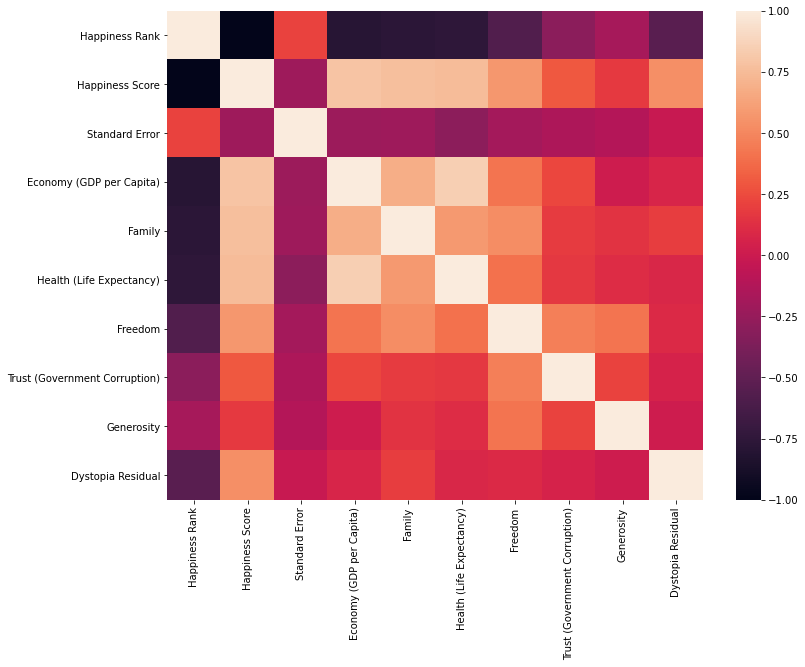

In [3]:
# Checking how the features are correlated to each other
plt.figure(figsize=(12,9))
sns.heatmap(file1.corr(method='spearman'))
plt.show()

In [4]:
# Let's see the data Region wise and display them using sorted values of "Happiness Rank"

file1.groupby('Region').agg([np.mean])

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769


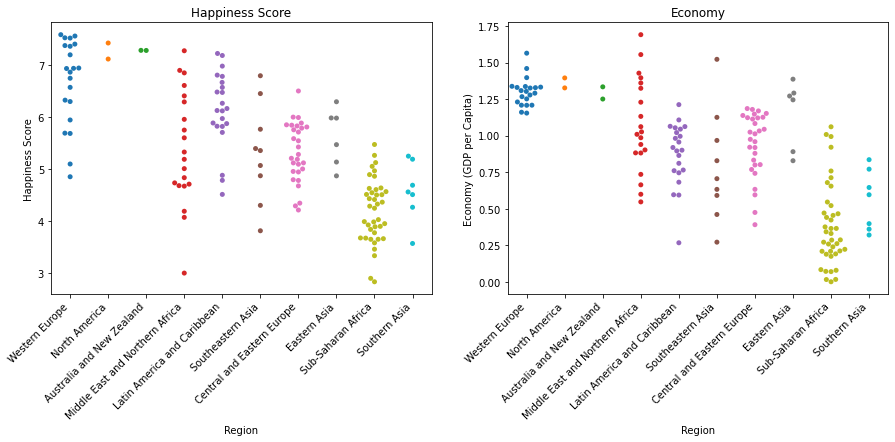

In [5]:
# Plot the data region wise 

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.swarmplot(x='Region', y='Happiness Score', data=file1)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Happiness Score')

plt.subplot(122)
sns.swarmplot(x='Region', y='Economy (GDP per Capita)', data=file1)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Economy')
plt.show()

In [6]:
# What are the relevant column features 
file1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
# Let's pick few columns and plot the data in a 2-D tSNE space

# Features taken into account are: 'Economy', 'Family, 'Health','Freedom','Trust', 'Generosity'
# Not including the Happiness Rank because that could be dependent on other features 
new_columns = file1.columns[[5,6,7,8,9,10]]
new_data = file1[new_columns]
new_data_labels = file1[['Country', 'Region']]
new_data.head()


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


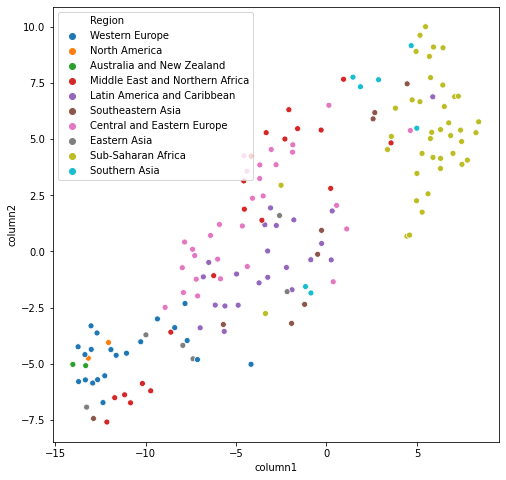

In [8]:
# Now let's visualize this data using t-SNE

from sklearn.manifold import TSNE
TSNE_data = pd.DataFrame(TSNE(n_components=2).fit_transform(new_data))
TSNE_data = TSNE_data.rename(columns={0: 'column1', 1:'column2'})
TSNE_data = pd.concat([file1[['Region']], TSNE_data], axis=1)

# PLotting the data 
plt.figure(figsize=(8,8))
sns.scatterplot(x='column1', y='column2', hue='Region', data=TSNE_data)
plt.show()

Take home message so far is that: Sub-Saharan and Southern Asia tend to cluster and North America, Western Europe and Australasia tend to cluster 

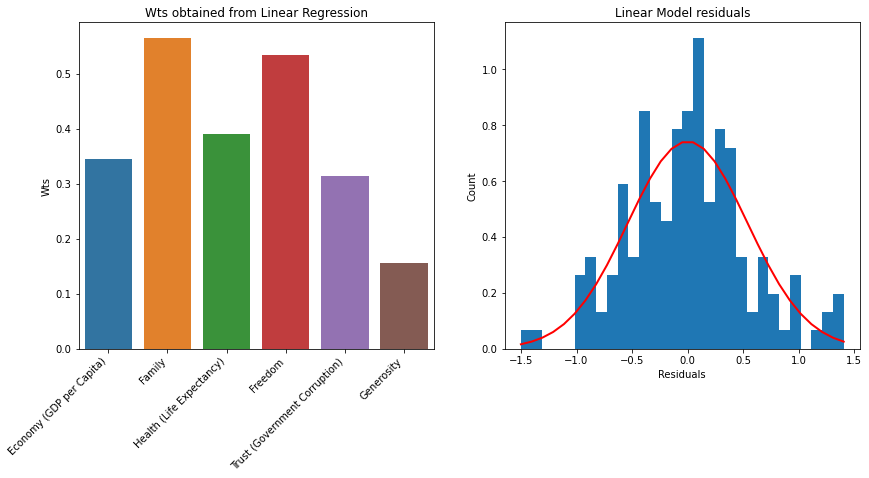

p T-test is 0.9999999999999998, and p Wilxocon is 0.854682170978815 
Pearson correlation between the residuals and the data, r=-0.4719761758486343, p=3.844853989109454e-10
Spearman correlation between the residuals and the data, r=-0.4715448267575298, p=4.0085736384742194e-10


In [9]:
# Next assignmenmt is to fit the Happiness Score ~ f(Economy, Health, Generosity, Family, Freedom, Trust)
from sklearn.linear_model import LinearRegression

linmodel = LinearRegression()
Y = file1['Happiness Score'].to_numpy().flatten()
X = new_data.to_numpy()
linmodel.fit(X,Y)
wts = linmodel.coef_
wts = wts/(np.sqrt(np.sum(wts**2)))

# Plotting those wts as a bar plot, checking how different factors contribute to Happiness Score 
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.barplot(x=new_data.columns, y = wts)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Wts')
plt.title('Wts obtained from Linear Regression')


# Plotting the residuals from the Linear fits
# plotting the distribution with a Gaussian fit 
residuals = linmodel.predict(X) - Y
plt.subplot(122)
counts, bins, ignore = plt.hist(residuals, 30, density=True)
plt.plot(bins, sp.stats.norm.pdf(bins, np.mean(residuals), np.std(residuals)), linewidth=2, color='r')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Linear Model residuals')
plt.show()
           
# Doing some stats test on the residuals : 1 sample T-test and Wilcoxon sign-rank test
_, p_ttest = sp.stats.ttest_1samp(residuals,0)
_, p_wilcoxon = sp.stats.wilcoxon(residuals)
print(f'p T-test is {p_ttest}, and p Wilxocon is {p_wilcoxon} ')
    
# Some additional analysis of the residuals: Trying both Pearson and Spearman  
r_pearson, p_pearson = sp.stats.pearsonr(residuals,Y)
print(f'Pearson correlation between the residuals and the data, r={r_pearson}, p={p_pearson}')

r_spearman, p_spearman = sp.stats.spearmanr(residuals, Y)
print(f'Spearman correlation between the residuals and the data, r={r_spearman}, p={p_spearman}')

# Clearly there is a funny relationship between the residuals and the actual Data. This is not good

Further analyzing the residuals and the data

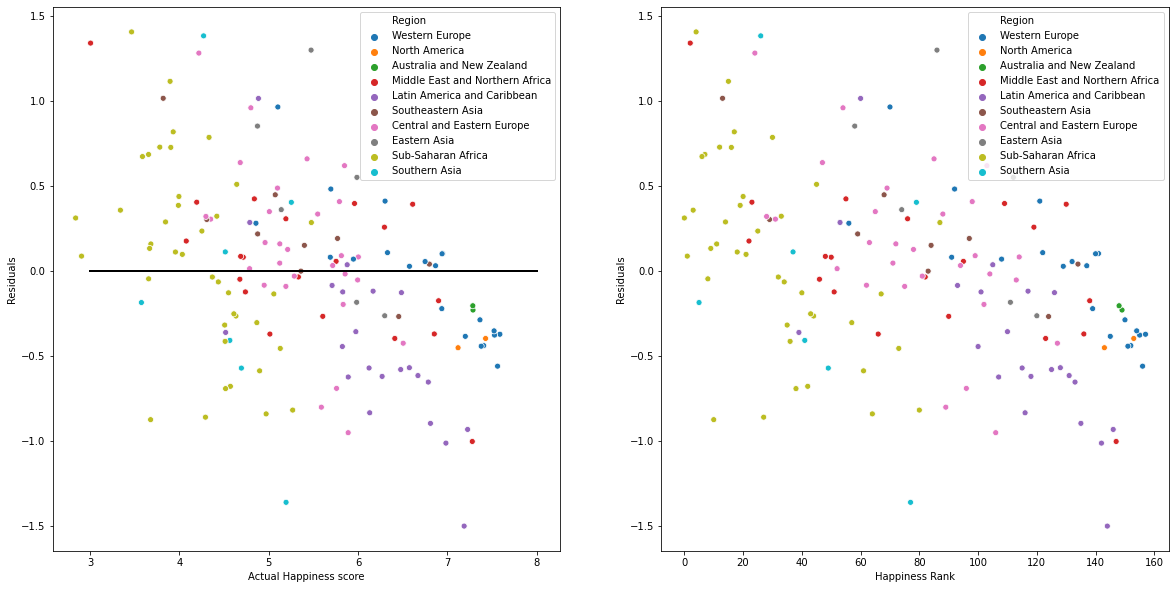

In [10]:
# Just plotting the raw residuals

ind = np.argsort(Y)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.scatterplot(x = Y, y = residuals, hue = file1['Region'])
plt.plot([3, 8], [0, 0], linewidth=2, color='k')
plt.ylabel('Residuals')
plt.xlabel('Actual Happiness score')

plt.subplot(122)
sns.scatterplot(x=ind, y= residuals, hue=file1['Region'])
plt.ylabel('Residuals')
plt.xlabel('Happiness Rank')
plt.show()

Happiness score is overpredicted for the third-world countries and underpredicted for the first-world countries 

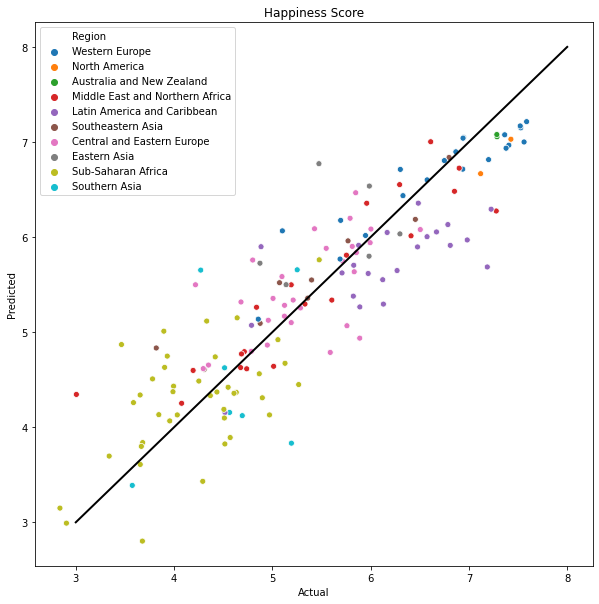

In [11]:
# Plotting the scatterplot for the actual and the predicted data. This will provide some answers

plt.figure(figsize=(10,10))
sns.scatterplot(x = Y, y = linmodel.predict(X), hue = file1['Region'])
plt.plot([3, 8], [3, 8], linewidth=2, color='k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Happiness Score')
plt.show()

# Need to whiten the data before predicting the Happiness Scores and then fitting the data using a linear model 

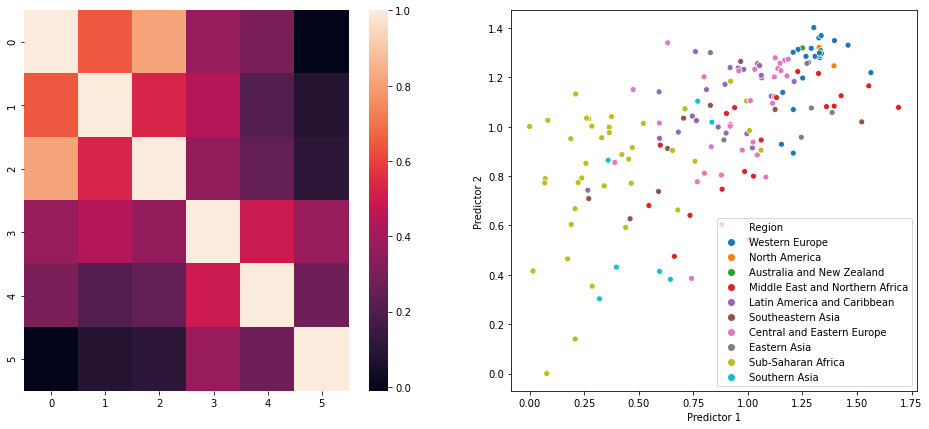

In [12]:
# Plotting the covariance matrix of the predictor variables
plt.figure(figsize=(16,7))
plt.subplot(121)
sns.heatmap(np.corrcoef(X.T))

plt.subplot(122)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = file1['Region'])
plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
plt.show()


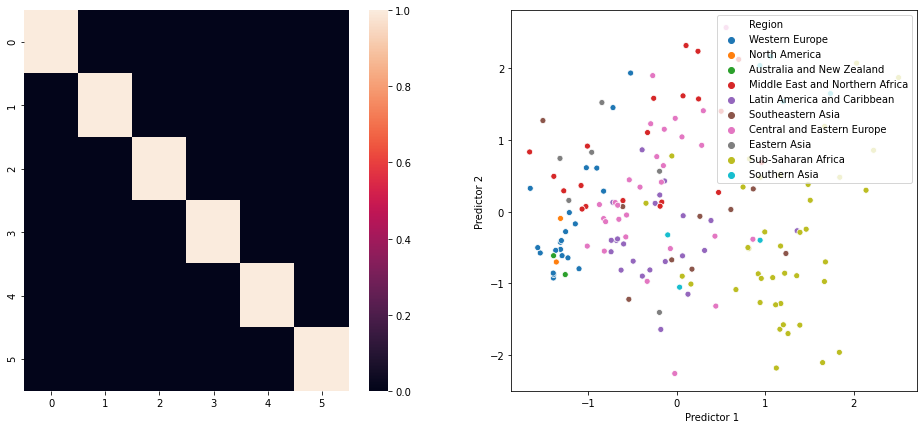

In [13]:
# Need to whiten this Data 
#evals, evecs = np.linalg.eigh(np.cov(X.T))
#X_white = np.dot(np.diag(evals**(-1/2))*evecs.T, X.T)
#X_white = X_white.T
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
X_white = pca.fit_transform(X)

# Checking the covariance matrix of the new data
plt.figure(figsize=(16,7))
plt.subplot(121)
sns.heatmap(np.corrcoef(X_white.T))


plt.subplot(122)
sns.scatterplot(x = X_white[:,0], y = X_white[:,1], hue = file1['Region'])
plt.xlabel('Predictor 1 ')
plt.ylabel('Predictor 2')
plt.show()

The results look much better now. I think the whitened data can be used for fitting the linear model

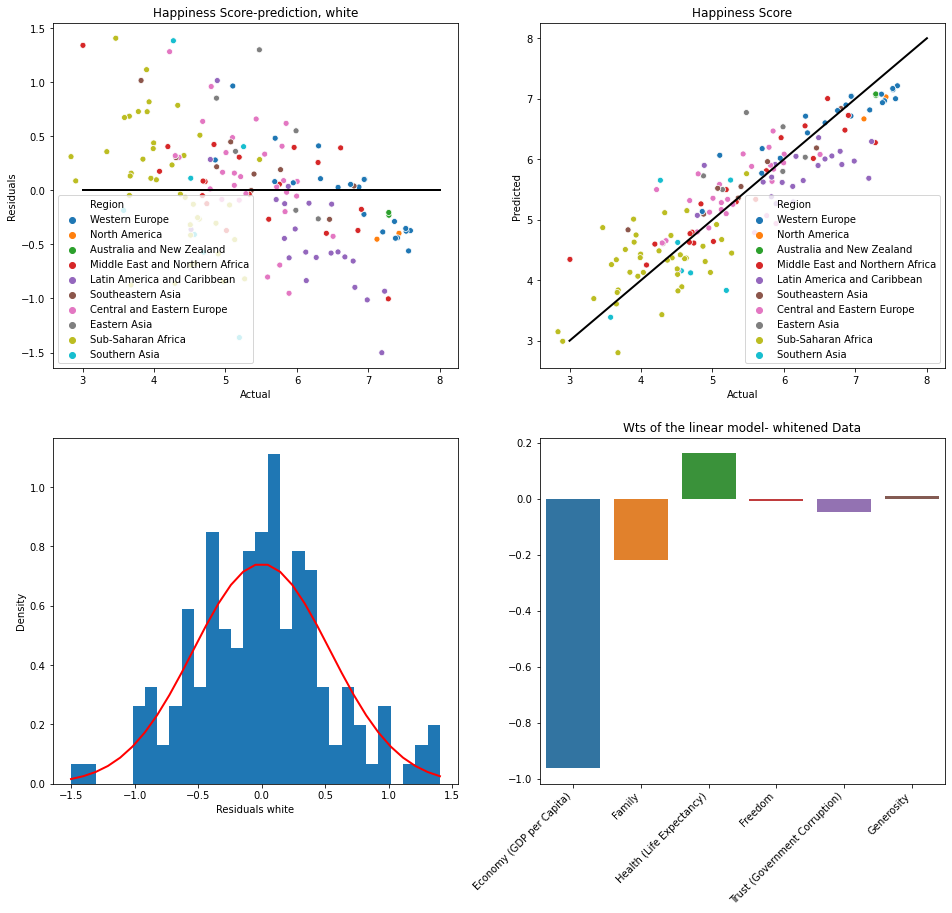

In [14]:
# Let's try fitting the model using the whitened data 
linear_model2 = LinearRegression()
linear_model2.fit(X_white, Y)

residuals_white = linear_model2.predict(X_white) - Y

plt.figure(figsize=(16,14))
plt.subplot(221)
sns.scatterplot(x = Y, y = residuals_white, hue=file1['Region'])
plt.plot([3,8], [0, 0], linewidth=2, color='k')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Happiness Score-prediction, white')


plt.subplot(222)
sns.scatterplot(x = Y, y = linear_model2.predict(X_white), hue=file1['Region'])
plt.plot([3,8], [3,8], linewidth=2, color='k')
plt.xlabel('Actual')
plt.title('Happiness Score')
plt.ylabel('Predicted')


# Plotting the histogram of residuals as well
plt.subplot(223)
counts, bins, ignore = plt.hist(residuals_white, 30, density=True)
plt.plot(bins, sp.stats.norm.pdf(bins, np.mean(residuals_white), np.std(residuals_white)), linewidth=2, color='r')
plt.xlabel('Residuals white')
plt.ylabel('Density')


# plotting the weights of the linear model
wts = linear_model2.coef_
wts = wts/np.sqrt(np.sum(wts**2))
plt.subplot(224)
sns.barplot(x = new_data.columns, y = wts)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Wts of the linear model- whitened Data')
plt.show()

# Thie axis of the subplot 224 is not interpretable because they have been transformed using the whitening. I think that linear model is just a bad predictor of the Happiness Score.

# Also, whitening the data does not necessarily solve the residual bias problem

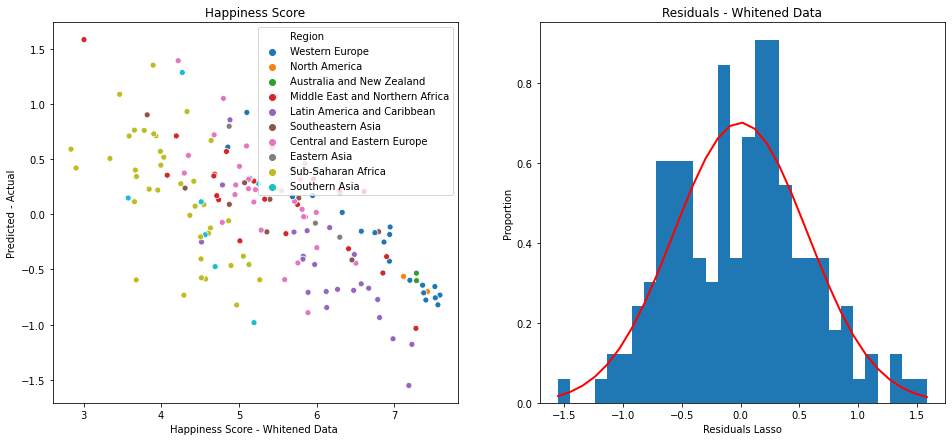

r=-0.6599325424629621, and p=4.081491139956395e-21


In [23]:
# Trying ridge regression on the Whitened Data 
from sklearn.linear_model import Lasso
lasso_alpha = 0.1
lasso_model = Lasso(alpha=lasso_alpha)
lasso_model.fit(X_white,Y)
residuals_lasso = lasso_model.predict(X_white)-Y

# PLotting the residuals 
plt.figure(figsize=(16,7))
plt.subplot(121)
sns.scatterplot(x = Y, y = residuals_lasso, hue = file1['Region'])
plt.xlabel('Happiness Score - Whitened Data ')
plt.ylabel('Predicted - Actual')
plt.title('Happiness Score')

plt.subplot(122)
counts, bins, ignore = plt.hist(residuals_lasso, 30, density=True)
plt.plot(bins, sp.stats.norm.pdf(bins, np.mean(residuals_lasso), np.std(residuals_lasso)), linewidth=2, color='r')
plt.xlabel('Residuals Lasso')
plt.ylabel('Proportion')
plt.title('Residuals - Whitened Data')
plt.show()

# Calculating the correlation values between the Residuals and the Happiness Score 
r_pearson, p_pearson = sp.stats.pearsonr(residuals_lasso, Y)
print(f'r={r_pearson}, and p={p_pearson}')

# Trying a Ridge regression as it is useful in case the multicollinearity is violated

Whitened Data r=-0.4771956425909456, and p=2.3106516029302065e-10


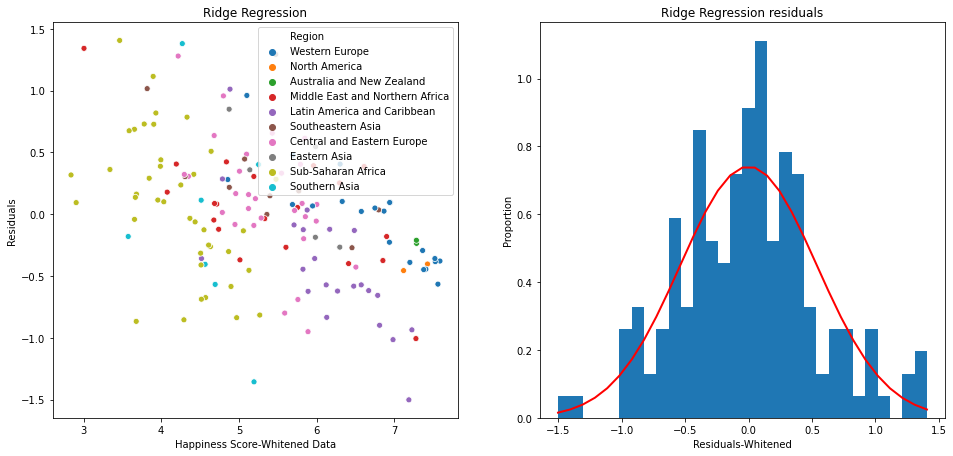

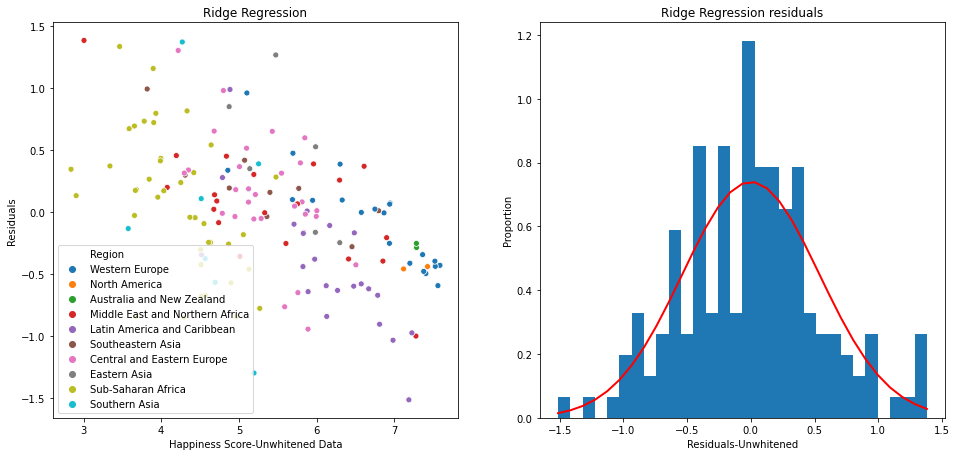

In [47]:
# Trying Ridge Regression for both the unwhitened and the whitened data

from sklearn.linear_model import Ridge
ridge_alpha = 0.5

# For the Whitened Data
ridge_modelw = Ridge(alpha=ridge_alpha)
ridge_modelw.fit(X_white,Y)
residualsw_ridge = ridge_modelw.predict(X_white) - Y

# For the unwhitened Data
ridge_modeluw = Ridge(alpha=ridge_alpha)
ridge_modeluw.fit(X,Y)
residualsuw_ridge = ridge_modeluw.predict(X) - Y

# Plotting the residuals- Whitened Data
plt.figure(figsize=(16,16))
plt.subplot(221)
sns.scatterplot(x=Y, y=residualsw_ridge, hue=file1['Region'])
plt.ylabel('Residuals')
plt.xlabel('Happiness Score-Whitened Data')
plt.title('Ridge Regression')


plt.subplot(222)
counts, bins, ignore = plt.hist(residualsw_ridge, 30, density=True)
plt.plot(bins, sp.stats.norm.pdf(bins, np.mean(residualsw_ridge), np.std(residualsw_ridge)), linewidth=2, color='r')
plt.xlabel('Residuals-Whitened')
plt.ylabel('Proportion')
plt.title('Ridge Regression residuals')

# Plotting the residuals- UnWhitened Data
plt.figure(figsize=(16,16))
plt.subplot(223)
sns.scatterplot(x=Y, y=residualsuw_ridge, hue=file1['Region'])
plt.ylabel('Residuals')
plt.xlabel('Happiness Score-Unwhitened Data')
plt.title('Ridge Regression')


plt.subplot(224)
counts, bins, ignore = plt.hist(residualsuw_ridge, 30, density=True)
plt.plot(bins, sp.stats.norm.pdf(bins, np.mean(residualsuw_ridge), np.std(residualsuw_ridge)), linewidth=2, color='r')
plt.xlabel('Residuals-Unwhitened')
plt.ylabel('Proportion')
plt.title('Ridge Regression residuals')


# Finding out the correlation between the
r_pearsonw, p_pearsonw = sp.stats.pearsonr(residualsw_ridge, Y)
print(f'Whitened Data r={r_pearsonw}, and p={p_pearsonw}')

# Linear models are a poor predictor of the Happiness Score based on the analysis of residuals

# Trying out SVM regression to predict happiness score as a function of features

Text(0.5, 1.0, 'SVM-sigmoid')

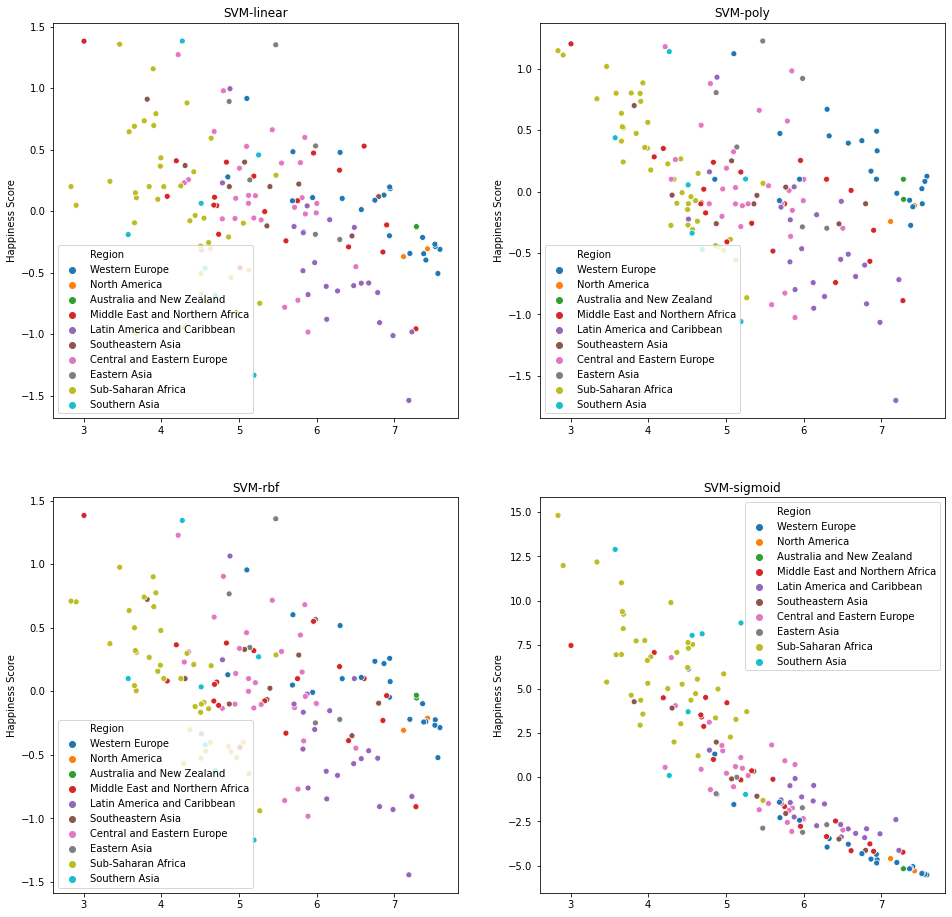

In [55]:
from sklearn.svm import SVR

# Comparing different kernels

# Linear kernel
sv_model_lin = SVR(kernel='linear', C=1.0, epsilon=0.2)
sv_model_lin.fit(X, Y)

# Polynomial kernel
sv_model_poly = SVR(kernel='poly')
sv_model_poly.fit(X,Y)

# RBF kernel
sv_model_rbf = SVR(kernel='rbf')
sv_model_rbf.fit(X,Y)

# Sigmoidal kernel
sv_model_sigmoid = SVR(kernel='sigmoid')
sv_model_sigmoid.fit(X,Y)

# plotting the results
plt.figure(figsize=(16,16))
plt.subplot(221)
sns.scatterplot(x=Y, y=sv_model_lin.predict(X)-Y, hue=file1['Region'])
plt.ylabel('residuals SVM')
plt.ylabel('Happiness Score')
plt.title('SVM-linear')

plt.subplot(222)
sns.scatterplot(x=Y, y=sv_model_poly.predict(X)-Y, hue=file1['Region'])
plt.ylabel('residuals SVM')
plt.ylabel('Happiness Score')
plt.title('SVM-poly')

plt.subplot(223)
sns.scatterplot(x=Y, y=sv_model_rbf.predict(X)-Y, hue=file1['Region'])
plt.ylabel('residuals SVM')
plt.ylabel('Happiness Score')
plt.title('SVM-rbf')

plt.subplot(224)
sns.scatterplot(x=Y, y=sv_model_sigmoid.predict(X)-Y, hue=file1['Region'])
plt.ylabel('residuals SVM')
plt.ylabel('Happiness Score')
plt.title('SVM-sigmoid')

# Still there is a negative correlation between the residuals and response variable 

# Trying out Random Forest Regressor 

Text(0.5, 1.0, 'Distribution of residuals')

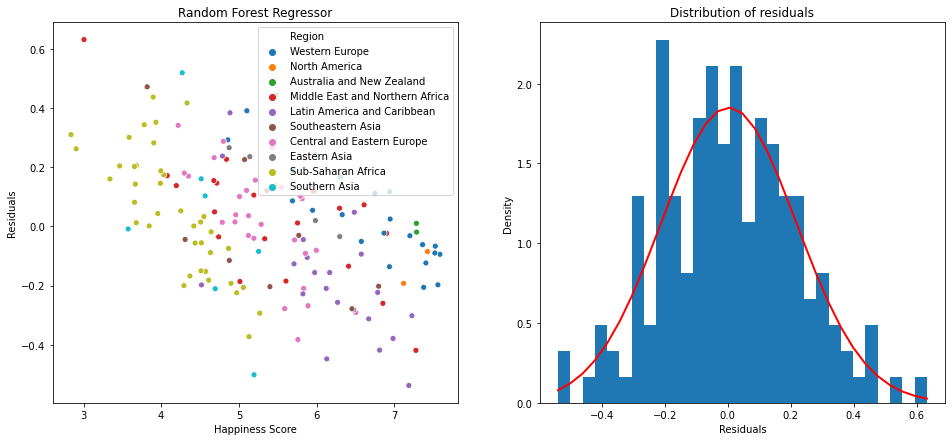

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X,Y)
residuals = rf_model.predict(X) - Y

# plotting the residuals from the model 
plt.figure(figsize=(16,7))
plt.subplot(121)
sns.scatterplot(x = Y, y = residuals, hue=file1['Region'])
plt.xlabel('Happiness Score')
plt.ylabel('Residuals')
plt.title('Random Forest Regressor')

plt.subplot(122)
counts, bins, ignore = plt.hist(residuals, 30, density = True)
plt.plot(bins, sp.stats.norm.pdf(bins, np.mean(residuals), np.std(residuals)), linewidth=2, color='r')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of residuals')

# The error distribution is more tighter suggesting that Random forest is a good regression model but the negative correlation still persists

# Comparing the performance of the models used so far 


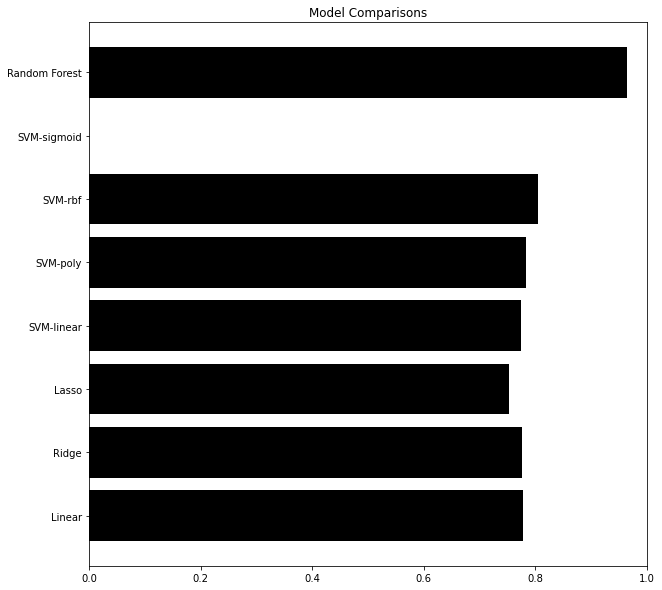

In [76]:
List_of_models = pd.Series({'model': ['Linear', 'Ridge', 'Lasso', 'SVM-linear', 'SVM-poly', 'SVM-rbf', 'SVM-sigmoid',
                                   'Random Forest']})

Model_scores = pd.Series({'score':[linmodel.score(X,Y), ridge_modeluw.score(X,Y), lasso_model.score(X_white,Y), 
                                  sv_model_lin.score(X,Y), sv_model_poly.score(X,Y), sv_model_rbf.score(X,Y), 
                                   sv_model_sigmoid.score(X,Y), rf_model.score(X,Y)]})
model_comparison = pd.concat([List_of_models, Model_scores], axis=0)

plt.figure(figsize=(10,10))
plt.barh(width = model_comparison['score'], y = model_comparison['model'], color='k')
plt.xlim([0, 1])
plt.title('Model Comparisons')
plt.show()

# Take home message: The random forest classifier is a superior predictor of Happiness score given the features taken into account and the happiness score cannot be described using a simple linear relationship of the predictor variables because of the important correlation structure in the Data